In [16]:
%reset

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Tutorial 9

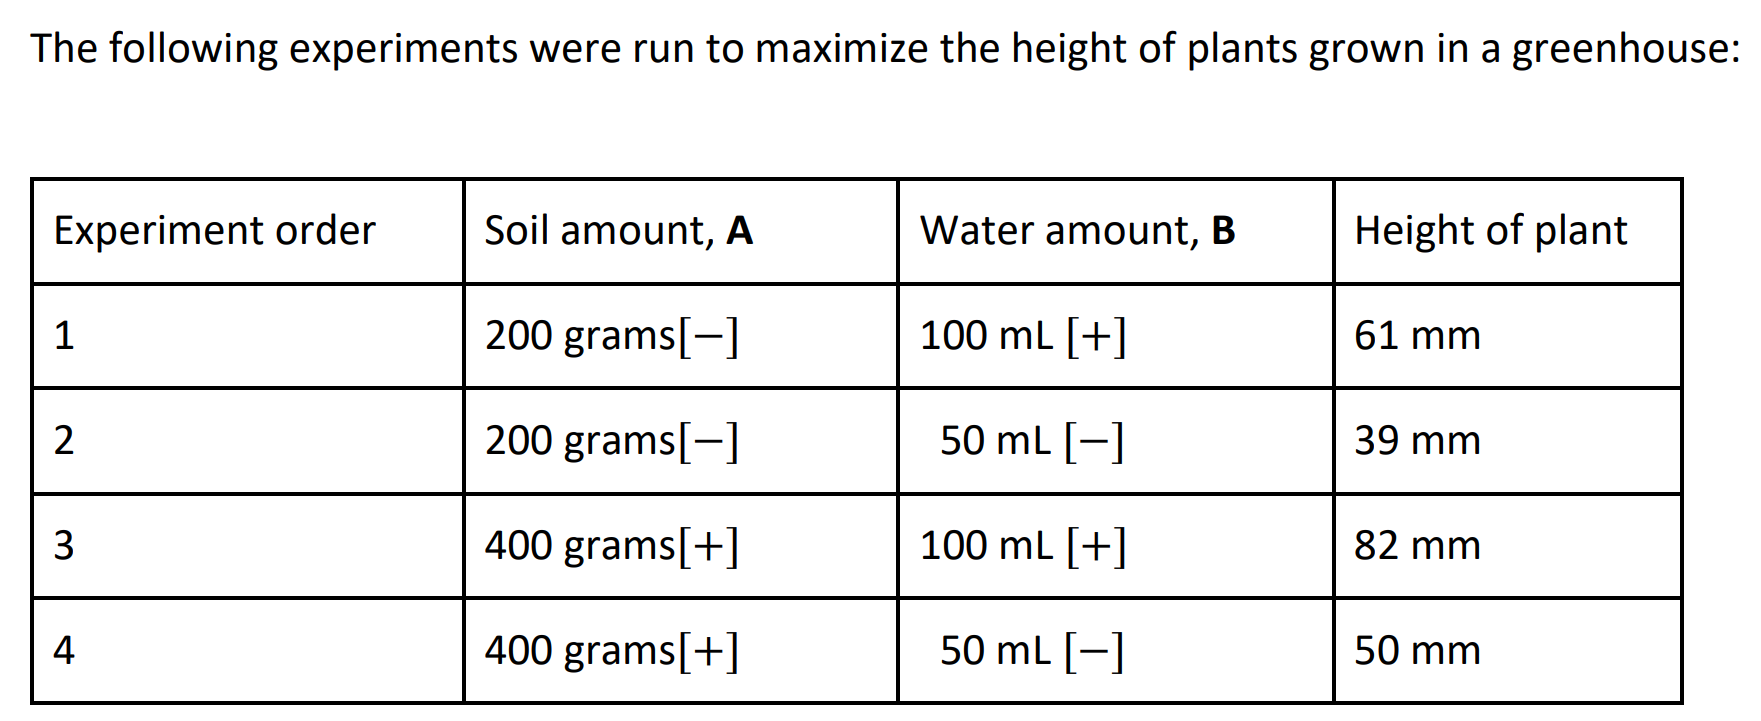

In [18]:
# create dataframe
dict = {
    'Order': [1, 2, 3, 4],
    'Soil Amount, A': [200, 200, 400, 400],
    'Water Amount, B': [100, 50, 100, 50],
    'Height of Plant': [61, 39, 82, 50]
}

df = pd.DataFrame(dict)
df

,Order,"Soil Amount, A","Water Amount, B",Height of Plant
0,1,200,100,61
1,2,200,50,39
2,3,400,100,82
3,4,400,50,50


# Step 1: Do by hand.

Write out the standard order table for a DOE analysis with X1= XA and X2= XB and an interaction term X1*X2= XA*XB.

Draw the cube plot for the system.  

In [19]:
std_order_dict = {
    'Experiment': [1, 2, 3, 4],
    'Soil': ["-", "-", "+", "+"],
    'Water': ["-", "+", "-", "+"],
    'Interaction': ["+", "-", "-", "+"],
    'Height': [61, 39, 82, 50]
}

std_order_df = pd.DataFrame(std_order_dict)
std_order_df

,Experiment,Soil,Water,Interaction,Height
0,1,-,-,+,61
1,2,-,+,-,39
2,3,+,-,-,82
3,4,+,+,+,50


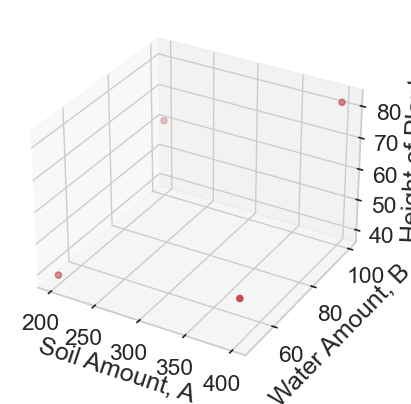

In [20]:
# create 3d scatter plot x: soil, y: water, z: height

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Soil Amount, A'], df['Water Amount, B'], df['Height of Plant'], c='r', marker='o')

ax.set_xlabel('Soil Amount, A')
ax.set_ylabel('Water Amount, B')
ax.set_zlabel('Height of Plant')

plt.show()

In [21]:
# y = 58 + 8*xA + 13.5*xB + 2.5*xA*xB

# Step 2: In Python

Fit the regression model in the form:

𝑦  = $\beta_{0}$  +  $\beta_{A}x_{A}$  +  $\beta_{B}x_{B}$ +  $\beta_{AB}x_{AB}$ where you report the coefficients for the y-intercept, the 2 main factor effects, and the 1 2-way interaction.

Create the ols regression model and print out the summary fitted information.

Write out the regression model.

In [26]:
# Fill in the pandas Series below with your coded standard order table units
# and response data
X1=pd.Series([-1, 1, -1, 1],name='Soil')
X2=pd.Series([-1, -1, 1, 1], name='Water')
X3=pd.Series([1, -1, -1, 1],name="Interaction")
Y=pd.Series([39, 50, 61, 82],name='Output')

In [ ]:
# Make a dataframe=DF to fit a regression model with ols
from statsmodels.formula.api import ols
import statsmodels.api as sm

DF=pd.concat([X1, X2, X3, Y],axis='columns')
DF

,Soil,Water,Interaction,Output
0,-1,-1,1,39
1,1,-1,-1,50
2,-1,1,-1,61
3,1,1,1,82


In [32]:
# Fit your regression model
model1 = ols('Y ~ X1 * X2', DF).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 29 Nov 2024   Prob (F-statistic):                nan
Time:                        09:59:18   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.0000        nan        nan        n

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / no

# Step 3 Show an interaction plot for the A and B factors

<Axes: xlabel='Water', ylabel='Output'>

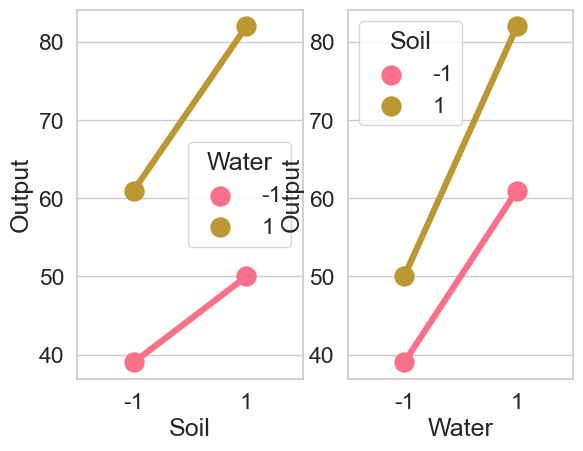

In [33]:
# factorplot, category plot, pointplot
fig, ax =plt.subplots(1,2,sharex=True)
sns.pointplot(x="Soil",y="Output",hue="Water",data=DF,ax=ax[0])
sns.pointplot(x="Water",y="Output",hue="Soil",data=DF, ax=ax[1])

# Step 4 

Generate a surface plot (OPTIONAL) and a contour plot.

What would be your next steps after seeing this contour plot?  What direction would you go?

Text(0.5, 0.5, 'Water')

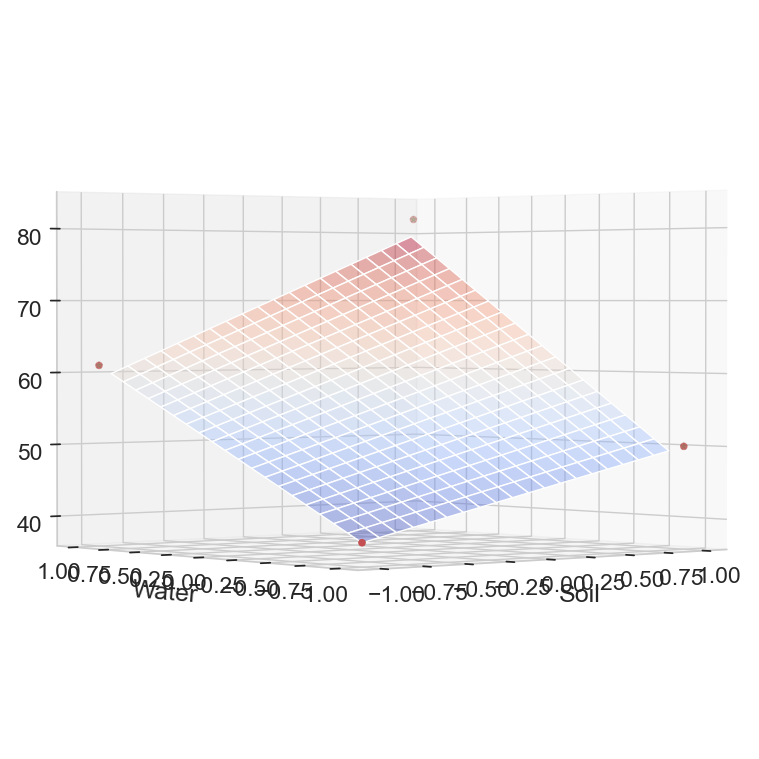

In [35]:
# %matplotlib widget (use this only if you have installed and imported Axes3D)
# from mpl_toolkits.mplot3d import Axes3D

# Create a surface plot of the model

fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DF
x = df["Soil"]
y = df["Water"]
z = df["Output"]

x1, x2 = model1.model.exog_names[1:3]

#x_surf=np.arange(x.min(), x.max(),1)
x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
#y_surf=np.arange(y.min(), y.max(),.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=model1.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,model1.fittedvalues.values,label="Fitted Values",color="r")

plt.xlabel("Soil")
plt.ylabel("Water")

Text(0, 0.5, 'Water')

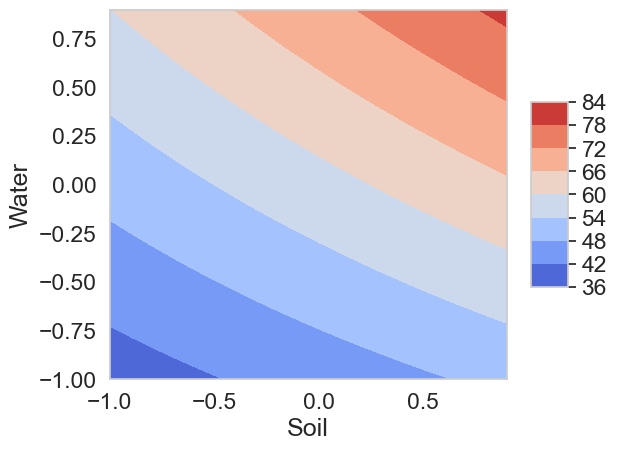

In [36]:
# create a contour plot of the model

fig=plt.figure()
ax=fig.add_subplot(111)

CountourA=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourA,shrink=0.5, aspect=5)
plt.xlabel("Soil")
plt.ylabel("Water")

# Step 5 Take a step in the direction of the steepest ascent.

Choose to take a step in the XA direction of 1 coded unit increase. 

Show where you would take a new experimental observation in coded units.

Show where you would take a new experimental observation in real world units.

In [ ]:
# 13.5 % 8

In [37]:
13.5/8

1.6875

coded units * (real world units - center point)/step size

For soil

1 = (Soil - 300) / (100)
Soil = 400

For water

1.7 = (Water - 75)/25
Water = 117.5

Step size is (upper bound - lower bound)/2

delta x2 / delta x1 = betax1 / betax2